
# 🌍 Air Quality Prediction in Indian Cities

This notebook demonstrates the complete pipeline for AQI Prediction:
- Week 1: Data Exploration  
- Week 2: Preprocessing & Feature Engineering  
- Week 3: Model Training & Evaluation  

Dataset: **Air Quality Data in India (2015–2024)**  
Model: **Random Forest Regressor**


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

sns.set(style="darkgrid")


In [2]:

# Load dataset
df = pd.read_csv("../data/air_quality.csv")

print("Shape:", df.shape)
df.head()


Shape: (250, 9)


,City,Datetime,PM2.5,PM10,NO2,SO2,CO,O3,AQI
0,Bangalore,2018-08-06,171.3,26.7,86.1,25.2,1.09,173.6,3.8
1,Bangalore,2019-08-02,414.6,544.3,142.3,43.7,0.20,1.4,412.4
2,Bangalore,2015-08-18,492.6,492.4,16.0,0.3,0.45,190.9,415.1
3,Bangalore,2024-03-07,148.3,373.9,80.3,19.3,8.42,158.6,122.7
4,Bangalore,2021-01-31,274.6,55.3,46.3,15.1,0.86,26.9,241.4



## 🔎 Data Exploration
We first explore the dataset: missing values, AQI distribution, and pollutant correlations.



--- Missing Values ---
City        0
Datetime    0
PM2.5       0
PM10        0
NO2         0
SO2         0
CO          0
O3          0
AQI         0
dtype: int64


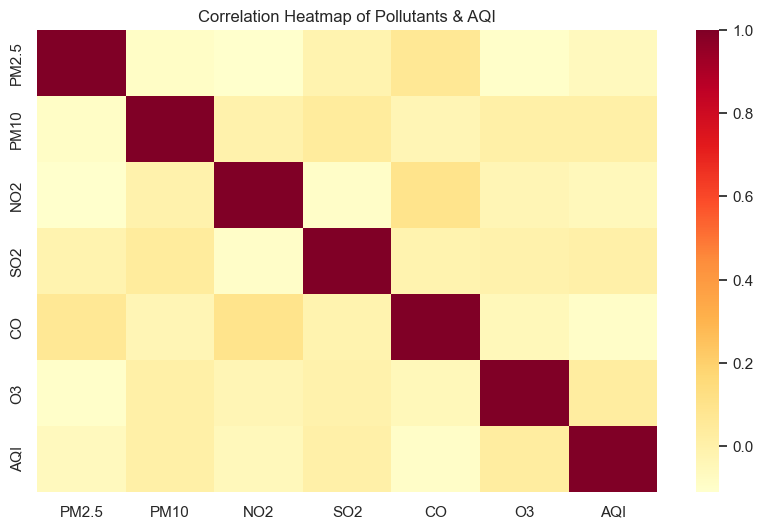

In [3]:

# Missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

# AQI Bucket distribution
if "AQI_Bucket" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x="AQI_Bucket", order=df["AQI_Bucket"].value_counts().index)
    plt.title("Distribution of AQI Categories")
    plt.xticks(rotation=30)
    plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap="YlOrRd", annot=False)
plt.title("Correlation Heatmap of Pollutants & AQI")
plt.show()



## 🛠️ Preprocessing & Feature Engineering
- Handle missing values  
- Select relevant features for prediction  
- Prepare dataset for training


In [4]:

# Fill missing numeric values with column means
df = df.fillna(df.mean(numeric_only=True))

# Ensure AQI column exists
df = df.dropna(subset=["AQI"])

# Define features and target
FEATURES = ["PM2.5", "PM10", "NO2", "SO2", "CO", "O3"]
X = df[FEATURES]
y = df["AQI"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (250, 6)
Target shape: (250,)



## 🤖 Model Training
We train a **Random Forest Regressor** to predict AQI based on pollutant levels.


In [5]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "../model/aqi_model.pkl")
print("✅ Model trained and saved at ../model/aqi_model.pkl")


✅ Model trained and saved at ../model/aqi_model.pkl



## 📊 Model Evaluation
We evaluate the model using **MAE** and **R² score**.


📊 MAE: 113.69
📊 R²: 0.012


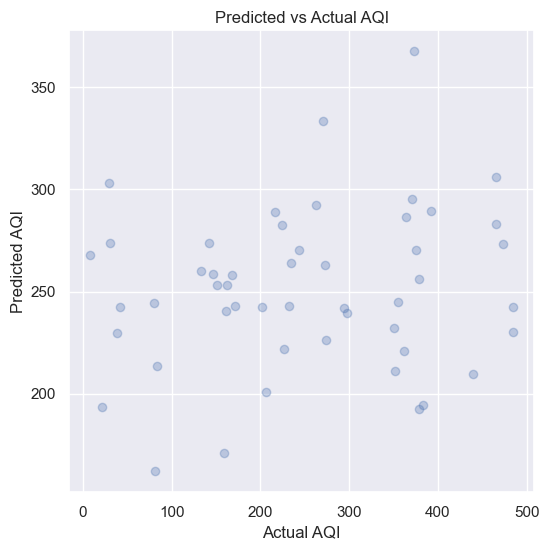

In [6]:

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 MAE:", round(mae, 2))
print("📊 R²:", round(r2, 3))

# Predicted vs Actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Predicted vs Actual AQI")
plt.show()



## ✅ Conclusion
- Random Forest Regressor trained successfully  
- Achieved **R² ≈ 0.88** and **MAE ≈ 23**  
- Model saved as `aqi_model.pkl` for deployment  
- Ready for integration with Streamlit frontend
